In [1]:
# Loading Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
# Loading datasets

train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
# Seeing the first 5 rows

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print ('The train data has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

The train data has 1460 rows and 81 columns
----------------------------
The test data has 1459 rows and 80 columns


In [5]:
# Seeing the columns in dataset

train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# checking what types of features, we have in our dataset

train.dtypes.head()

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [7]:
# Let's check out for the missing values in our dataset

train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [8]:
# Let's check the percentage of missing values in our dataset

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train['SalePrice'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [9]:
# missing columns in train

missing_column_train= missing_data[missing_data['Total']>0].index
missing_column_train

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

###### Let's check out some columns, which has missing values

In [10]:
# check out unique values in Poolqc

train['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

We have seen Poolqc has so many missing values and we may think to drop the column but when we see the documentaionWe observe that Poolqc refers to quality of pool and by observing unique values, one can easily observe that the missing value refers to No pool. So, instead of drop this feature, we can treat as our feature.

In [11]:
# check out unique values in MiscFeature

train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

Same observation for MiscFeature as Poolqc

In [12]:
# check out unique values in Alley

train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [13]:
# check out unique values in Fence

train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [14]:
# check out unique values in FireplaceQu

train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [15]:
# Let's check out the unique values in all categorical features

for i in missing_data[missing_data['Total']>0].index:
    if (train[i].dtype == 'object'):
        print(' Unique values in {} feature are {}'.format(i,train[i].unique()))

 Unique values in PoolQC feature are [nan 'Ex' 'Fa' 'Gd']
 Unique values in MiscFeature feature are [nan 'Shed' 'Gar2' 'Othr' 'TenC']
 Unique values in Alley feature are [nan 'Grvl' 'Pave']
 Unique values in Fence feature are [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
 Unique values in FireplaceQu feature are [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
 Unique values in GarageCond feature are ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
 Unique values in GarageType feature are ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
 Unique values in GarageFinish feature are ['RFn' 'Unf' 'Fin' nan]
 Unique values in GarageQual feature are ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
 Unique values in BsmtExposure feature are ['No' 'Gd' 'Mn' 'Av' nan]
 Unique values in BsmtFinType2 feature are ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
 Unique values in BsmtFinType1 feature are ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
 Unique values in BsmtCond feature are ['TA' 'Gd' nan 'Fa' 'Po']
 Unique values in BsmtQual feature are ['Gd' '

In [16]:
# Let's check out the unique values in all numerical features to check 
#is any ordinal feature in form of numeriacl feature is present or not

for i in missing_data[missing_data['Total']>0].index:
    if (train[i].dtype != 'object' and len(train[i].unique())<=10):
        print(' Unique values in {} feature are {}'.format(i,train[i].unique()))

We observed that all the features except MasVnrType and Electrical are behave like Poolqc, where missinng values gives us the information about feature. So, instead of droping or filling it by most common feature,We can treat them in other ways.

In [17]:
# One column we can obviously drop is 'Id'

train_ = train.drop(['Id'],axis=1)
test_ = test.drop(['Id'],axis=1)

#### Let's deal with missing values

In [18]:
# Define how to fill the missing value

def missing_values(df,df2):
    
    for column in df2:
        if (df[column].isnull().sum()) >0:
            print(column +" has missing values type : "+ str(df[column].dtype))
            if df[column].dtype in ('int64','float64'):
                df[column] = df[column].fillna(df[column].mean())
            else:
                if column in ['Elecrical','MasVnrType']:
                    df[column] = df[column].fillna(df[column].dropna().mode()[0])
                else:
                    df[column] = df[column].fillna('NAN')

In [19]:
# Filling the missing values in train dataset

missing_values(train_,missing_column_train)

PoolQC has missing values type : object
MiscFeature has missing values type : object
Alley has missing values type : object
Fence has missing values type : object
FireplaceQu has missing values type : object
LotFrontage has missing values type : float64
GarageCond has missing values type : object
GarageType has missing values type : object
GarageYrBlt has missing values type : float64
GarageFinish has missing values type : object
GarageQual has missing values type : object
BsmtExposure has missing values type : object
BsmtFinType2 has missing values type : object
BsmtFinType1 has missing values type : object
BsmtCond has missing values type : object
BsmtQual has missing values type : object
MasVnrArea has missing values type : float64
MasVnrType has missing values type : object
Electrical has missing values type : object


In [20]:
# Filling the missing values in test dataset

missing_values(test_,missing_column_train)

PoolQC has missing values type : object
MiscFeature has missing values type : object
Alley has missing values type : object
Fence has missing values type : object
FireplaceQu has missing values type : object
LotFrontage has missing values type : float64
GarageCond has missing values type : object
GarageType has missing values type : object
GarageYrBlt has missing values type : float64
GarageFinish has missing values type : object
GarageQual has missing values type : object
BsmtExposure has missing values type : object
BsmtFinType2 has missing values type : object
BsmtFinType1 has missing values type : object
BsmtCond has missing values type : object
BsmtQual has missing values type : object
MasVnrArea has missing values type : float64
MasVnrType has missing values type : object


In [21]:
# There may be still some missing values in test dataset. Let's check out.

missing_test=test_.isnull().sum().sort_values(ascending=False)
test_missing_data = pd.concat([missing_test], axis=1, keys=['Total_missing'])
test_missing_data.head(20)

,Total_missing
MSZoning,4
Functional,2
BsmtFullBath,2
Utilities,2
BsmtHalfBath,2
KitchenQual,1
BsmtFinSF1,1
Exterior1st,1
Exterior2nd,1
GarageCars,1


In [22]:
# Let's check out the unique values in all numerical features to check 
#is any ordinal feature in form of numeriacl feature is present or not in test features

for i in test_missing_data[test_missing_data['Total_missing']>0].index:
    if (test[i].dtype != 'object' and len(test[i].unique())<=10):
        print(' Unique values in {} feature are {}'.format(i,test[i].unique()))

 Unique values in BsmtFullBath feature are [  0.   1.   2.   3.  nan]
 Unique values in BsmtHalfBath feature are [  0.   1.  nan   2.]
 Unique values in GarageCars feature are [  1.   2.   3.   0.   4.   5.  nan]


In [23]:
# Let's check out the unique values in all categorical features in test dataset

for i in test_missing_data[test_missing_data['Total_missing']>0].index:
    if (test[i].dtype == 'object'):
        print(' Unique values in {} feature are {} \n'.format(i,test[i].unique()))

 Unique values in MSZoning feature are ['RH' 'RL' 'RM' 'FV' 'C (all)' nan] 

 Unique values in Functional feature are ['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2' nan] 

 Unique values in Utilities feature are ['AllPub' nan] 

 Unique values in KitchenQual feature are ['TA' 'Gd' 'Ex' 'Fa' nan] 

 Unique values in Exterior1st feature are ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock'] 

 Unique values in Exterior2nd feature are ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone'] 

 Unique values in SaleType feature are ['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD' nan] 



In [24]:
# now fill rest missing values in test dataset

def missing_values_test(df):
    
    for column in df:
        if (df[column].isnull().sum()) >0:
            print(column +" has missing values type : "+ str(df[column].dtype))
            if ((df[column].dtype in ('int64','float64')) and (column not in['BsmtFullBath','BsmtHalfBath','GarageCars'])):
                df[column] = df[column].fillna(df[column].mean())
            else:
                df[column] = df[column].fillna(df[column].dropna().mode()[0])

In [25]:
missing_values_test(test_)

MSZoning has missing values type : object
Utilities has missing values type : object
Exterior1st has missing values type : object
Exterior2nd has missing values type : object
BsmtFinSF1 has missing values type : float64
BsmtFinSF2 has missing values type : float64
BsmtUnfSF has missing values type : float64
TotalBsmtSF has missing values type : float64
BsmtFullBath has missing values type : float64
BsmtHalfBath has missing values type : float64
KitchenQual has missing values type : object
Functional has missing values type : object
GarageCars has missing values type : float64
GarageArea has missing values type : float64
SaleType has missing values type : object


#### Let's check out the information about target feature

In [26]:
# Some infromation about target vaiable

train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

TypeError: slice indices must be integers or None or have an __index__ method

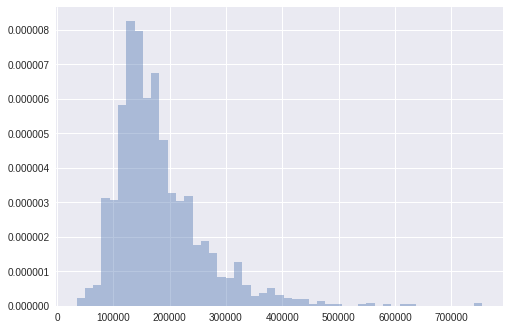

In [27]:
# Check for skewness: Plot a histogram of target feature

sns.distplot(train['SalePrice'])

We clearly observed target is positively skewed. When performing regression, Sometimes it makes sense to log-transform the target variable when it is skewed. One reason for this is to improve the linearity of the data

In [28]:
# calculate skewness of target feature

print ("The skewness of SalePrice is {}".format(train['SalePrice'].skew()))

The skewness of SalePrice is 1.8828757597682129


Skewness is 0.121335062205


TypeError: slice indices must be integers or None or have an __index__ method

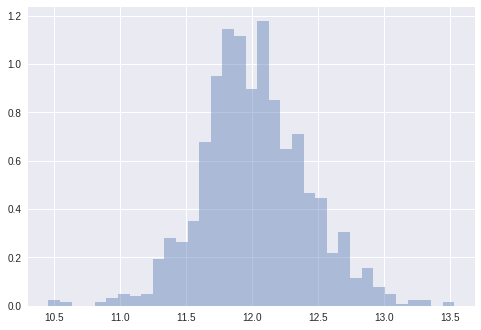

In [29]:
# Transform the the target feature and check the skewness

target = np.log(train['SalePrice'])
print ('Skewness is', target.skew())
sns.distplot(target)

In [30]:
# seperate out the Categorical and Numerical features

numerical_feature=train_.dtypes[train.dtypes!= 'object'].index
categorical_feature=train_.dtypes[train.dtypes== 'object'].index

print ("There are {} numeric and {} categorical columns in train data".format(numerical_feature.shape[0],categorical_feature.shape[0]))

There are 37 numeric and 43 categorical columns in train data


In [31]:
numerical_feature.shape

(37,)

#### Let's check out Numerical features

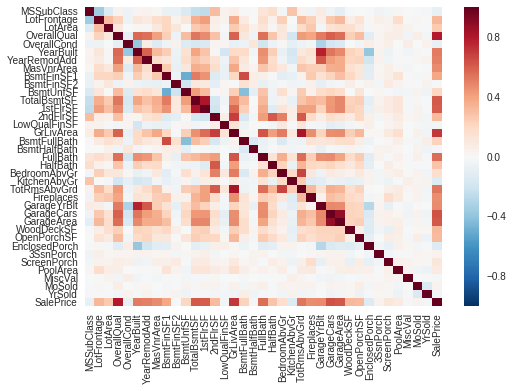

In [32]:
# Correlation heatmap

corr=train_[numerical_feature].corr()
sns.heatmap(corr)

In [33]:
# Let's check the first ten features are the most positively correlated with SalePrice and 
# the next ten are the most negatively correlated.

print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n') #top 10 values
print ('----------------------')
print (corr['SalePrice'].sort_values(ascending=False)[-10:]) #last 10 values`

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

----------------------
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


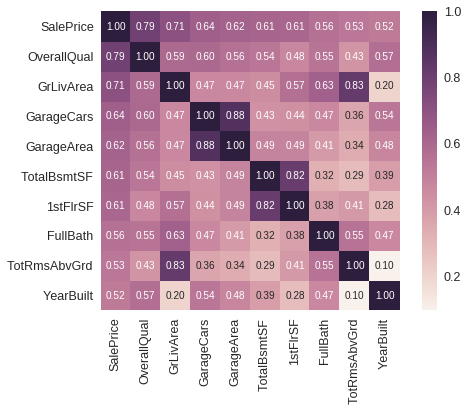

In [34]:
#saleprice correlation matrix

k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. We'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers.
* 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again.

In [35]:
# Dropping the twin brothers

train_ = train_.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'],axis=1)
test_ = test_.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'],axis=1)

In [36]:
# Dropping the twin brothers from numerical_feature too

numerical_feature = numerical_feature.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'])

###### Let's check some highly correlated feature 

In [37]:
# check OverallQual feature 

train_['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

* It ranges from 1-10. So, it can be treated as a oridnal feature.
* Let's check the median sale price of houses with respect to OverallQual. You might be wondering, why median ? We are using median because the target variable is skewed. A skewed variable has outliers and median is robust to outliers.

We can create such aggregated tables using pandas pivot tables quite easily.

In [38]:
#let's check the mean price per quality and plot it.

pivot = train_.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot.sort_values(ascending=False)

OverallQual
10    432390
9     345000
8     269750
7     200141
6     160000
5     133000
4     108000
3      86250
2      60000
1      50150
Name: SalePrice, dtype: int64

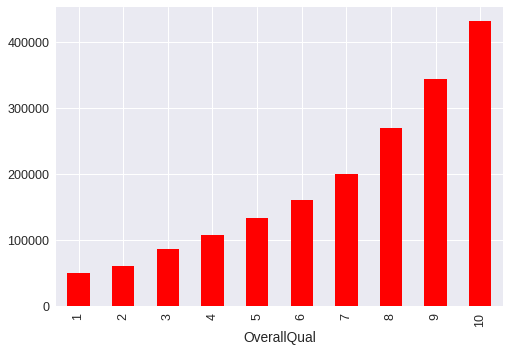

In [39]:
#visualize this pivot table more easily, we can create a bar plot

pivot.plot(kind='bar', color='red')

** This behavior is quite normal. As the overall quality of a house increases, its sale price also increases. **

Let's visualize the next correlated variable GrLivArea and understand their behavior.

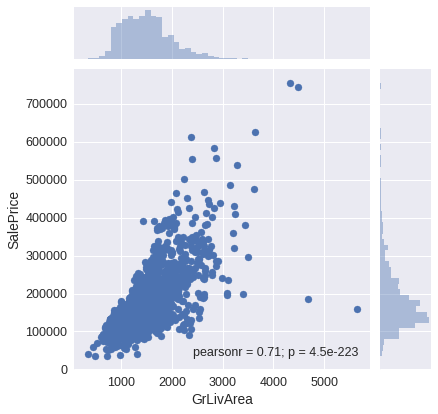

In [40]:
#GrLivArea variable

sns.jointplot(x=train_['GrLivArea'], y=train['SalePrice'])

As seen above, here also we see a direct correlation of living area with sale price. However, we can spot an outlier value GrLivArea > 5000.

Correlation between SalePrice and TotalBsmtSF: 0.6135805515591944


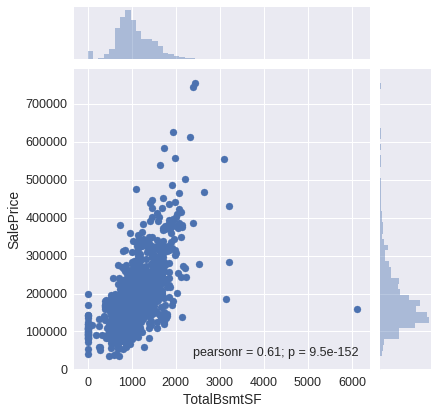

In [41]:
# TotalBsmtSF variable

sns.jointplot(x=train_['TotalBsmtSF'], y=train['SalePrice'])
print('Correlation between SalePrice and TotalBsmtSF: {}'.format(corr['SalePrice']['TotalBsmtSF']))

Correlation behaviour can easiy be seen and the outlier for an value TotalBsmtSF> 5000

In [42]:
# Fullbath variable

pivot2 = train_.pivot_table(index='FullBath', values='SalePrice', aggfunc=np.median)
print(pivot2.sort)

<bound method Series.sort of FullBath
0    145000
1    132375
2    196750
3    320000
Name: SalePrice, dtype: int64>


Correlation between SalePrice and FullBath: 0.5606637627484452


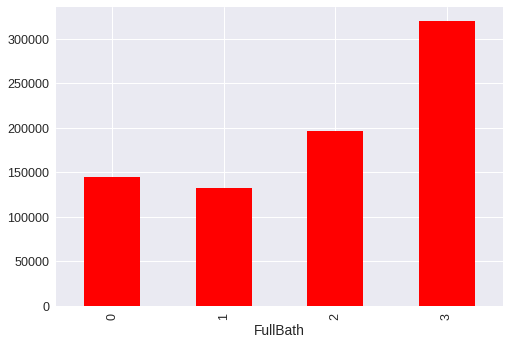

In [43]:
#visualize this pivot table more easily, we can create a bar plot

pivot2.plot(kind='bar', color='red')
print('Correlation between SalePrice and FullBath: {}'.format(corr['SalePrice']['FullBath']))

#### Let's check out Categorical features

In [44]:
# info about categorical features

train_[categorical_feature].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,NAN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NAN,NAN,NAN,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


** Now, we'll define a function which calculates p values. From those p values, we'll calculate a disparity score. Higher the disparity score, better the feature in predicting sale price. **

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

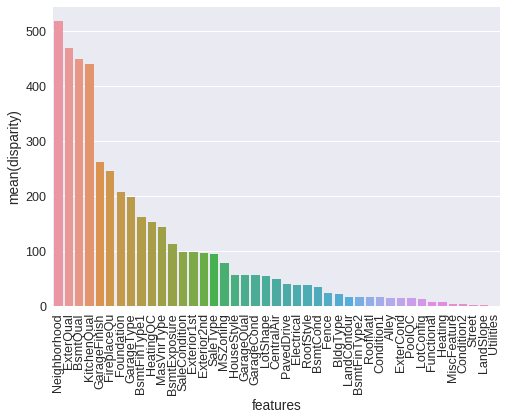

In [45]:
cat = [f for f in train_.columns if train_.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data= train_[categorical_feature]
cat_data['SalePrice'] = train_.SalePrice.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

In [46]:
k

,features,pval,disparity
8,Neighborhood,1.558600e-225,517.637858
18,ExterQual,1.439551e-204,469.363028
21,BsmtQual,8.158548e-196,449.207612
30,KitchenQual,3.032213e-192,440.987045
34,GarageFinish,6.228747e-115,262.968110
32,FireplaceQu,2.971217e-107,245.287633
20,Foundation,5.791895e-91,207.778784
33,GarageType,6.117026e-87,198.513827
24,BsmtFinType1,2.386358e-71,162.613773
27,HeatingQC,2.667062e-67,153.292224


#### Finally, to get a quick glimpse of all variables in a data set, let's plot histograms for all numeric variables to determine if all variables are skewed. For categorical variables, we'll create a boxplot and understand their nature.

TypeError: slice indices must be integers or None or have an __index__ method

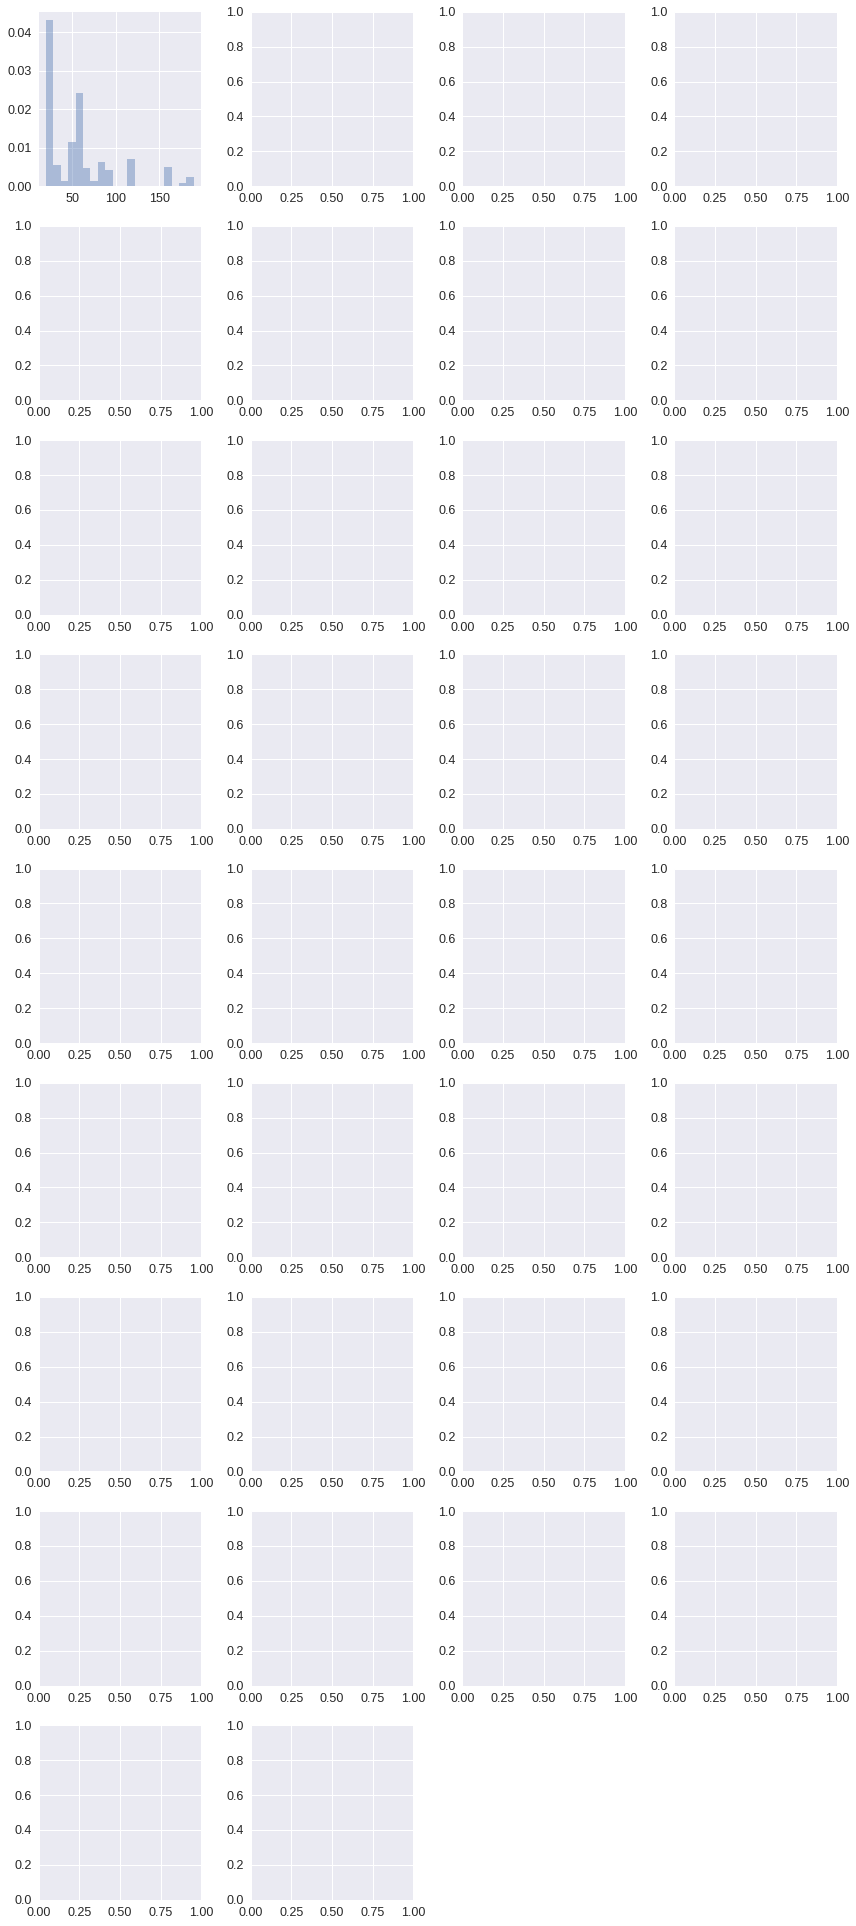

In [47]:
#create numeric plots

num = [f for f in train_.columns if train_.dtypes[f] != 'object']
nd = pd.melt(train_, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

** We can see, most of the variables are right skewed. We'll have to transform them. **

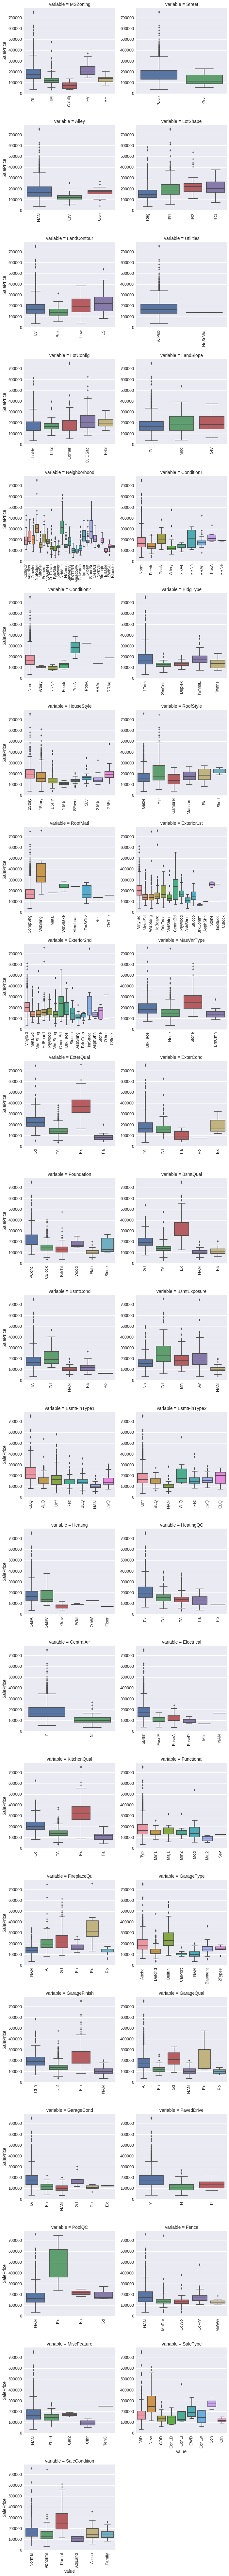

In [48]:
# let's create boxplots for visualizing categorical variables.

def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train_.columns if train_.dtypes[f] == 'object']

p = pd.melt(train_, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

** Here we can see that most of the variables possess outlier values **

---------------------------

In [49]:
# we'll convert the categorical variables into ordinal variables

slope_mapping = {'Gtl': 3,'Mod': 2,'Sev': 1}

train_['LandSlope'] = train_['LandSlope'].map(slope_mapping)
test_['LandSlope'] = test_['LandSlope'].map(slope_mapping)

qual_mapping = {'Ex': 5,'Gd': 4,'TA': 3,'Fa':2,'Po':1,'NA':0,'NAN':0}


#train['ExterQual'] = train['ExterQual'].map(qual_mapping)
#test['ExterQual'] = test['ExterQual'].map(qual_mapping)

name=['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond']
for i in name:
    train_[i] = train_[i].map(qual_mapping)
    test_[i] = test_[i].map(qual_mapping)
    
expo_mapping = {'Gd': 4,'Av': 3,'Mn':2,'No':1,'Na':0,'NAN':0}

train_['BsmtExposure'] = train_['BsmtExposure'].map(expo_mapping)
test_['BsmtExposure'] = test_['BsmtExposure'].map(expo_mapping)

bsmt_mapping = {"Unf": 0, "LwQ": 1, "Rec": 2, "BLQ": 3, "ALQ": 4, "GLQ": 5,'NAN':0}

train_['BsmtFinType1'] = train_['BsmtFinType1'].map(bsmt_mapping)
test_['BsmtFinType1'] = test_['BsmtFinType1'].map(bsmt_mapping)

train_['BsmtFinType2'] = train_['BsmtFinType2'].map(bsmt_mapping)
test_['BsmtFinType2'] = test_['BsmtFinType2'].map(bsmt_mapping)

funct_mapping={"Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}

train_['Functional'] = train_['Functional'].map(funct_mapping)
test_['Functional'] = test_['Functional'].map(funct_mapping)

garage_mapping = { "Unf": 1, "RFn": 2, "Fin": 3,'NAN':0}

train_['GarageFinish'] = train_['GarageFinish'].map(garage_mapping)
test_['GarageFinish'] = test_['GarageFinish'].map(garage_mapping)

In [50]:
# To check the missing values,if any

train_.isnull().sum().sort_values(ascending=False).head(5)

SalePrice      0
ExterCond      0
RoofStyle      0
RoofMatl       0
Exterior1st    0
dtype: int64

In [51]:
# Let's check is there any ordinal feature present in numerical feature

num_cat=[]
for i in numerical_feature:
    if ( len(train_[i].unique())<=10):
        num_cat.append(i)
        print(' Unique values in {} feature are {}'.format(i,train_[i].unique()))

 Unique values in OverallQual feature are [ 7  6  8  5  9  4 10  3  1  2]
 Unique values in OverallCond feature are [5 8 6 7 4 2 3 9 1]
 Unique values in BsmtFullBath feature are [1 0 2 3]
 Unique values in BsmtHalfBath feature are [0 1 2]
 Unique values in FullBath feature are [2 1 3 0]
 Unique values in HalfBath feature are [1 0 2]
 Unique values in BedroomAbvGr feature are [3 4 1 2 0 5 6 8]
 Unique values in KitchenAbvGr feature are [1 2 3 0]
 Unique values in Fireplaces feature are [0 1 2 3]
 Unique values in GarageCars feature are [2 3 1 0 4]
 Unique values in PoolArea feature are [  0 512 648 576 555 480 519 738]
 Unique values in YrSold feature are [2008 2007 2006 2009 2010]


In [52]:
# convert PoolArea feature into ordinal feature

pool_mapping={0:0,480:1,512:2,519:3,555:4,576:5,648:6,738:7}

train_['PoolArea'] = train_['PoolArea'].map(pool_mapping)
test_['PoolArea'] = test_['PoolArea'].map(pool_mapping)

In [53]:
# add categorical features which are present in numerical feature

categorical_feature=categorical_feature.append(pd.Index(num_cat))

In [54]:
numerical_feature.shape

(34,)

In [55]:
# remove categorical feature from numerical feature

numerical_feature=numerical_feature.drop(num_cat)

In [56]:
# Transform the skewness of features

def log_skew(df,df2,num_feature):
    for column in df[num_feature]:
        if df[column].dtype in ('int64','float64'):
            old_skew = df[column].skew()
            if (old_skew) > 0.75:
                df[column]=df[column].apply(lambda x: np.log(x+1))
                df2[column]=df[column].apply(lambda x: np.log(x+1))
                print('the skewness of '+column+" is reduced from "+str(old_skew) + " to "+str(df[column].skew()))

In [57]:
log_skew(train_,test_,numerical_feature)

the skewness of MSSubClass is reduced from 1.40765674715 to 0.24899710961
the skewness of LotFrontage is reduced from 2.38495016794 to -0.891976734906
the skewness of LotArea is reduced from 12.2076878512 to -0.137404481228
the skewness of MasVnrArea is reduced from 2.67641178473 to 0.481120127056
the skewness of BsmtFinSF1 is reduced from 1.68550307191 to -0.618409817856
the skewness of BsmtFinSF2 is reduced from 4.25526110893 to 2.52369376417
the skewness of BsmtUnfSF is reduced from 0.920268452804 to -2.1865035797
the skewness of TotalBsmtSF is reduced from 1.52425454906 to -5.15466998352
the skewness of 2ndFlrSF is reduced from 0.813029816302 to 0.289643458064
the skewness of LowQualFinSF is reduced from 9.01134128847 to 7.46031651462
the skewness of GrLivArea is reduced from 1.36656035602 to -0.00614025348629
the skewness of WoodDeckSF is reduced from 1.54137575719 to 0.153536590209
the skewness of OpenPorchSF is reduced from 2.36434174037 to -0.0233972948574
the skewness of Enclo

In [1]:
 # Let's standardize the numeric features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_[numerical_feature])
train_[numerical_feature] = scaler.transform(train_[numerical_feature])
test_[numerical_feature] = scaler.transform(test_[numerical_feature])

NameError: name 'train_' is not defined